<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png"></a>


<br>
  <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
<br>

This <a href="https://github.com/ultralytics/yolov5">YOLOv5</a> 🚀 notebook by <a href="https://ultralytics.com">Ultralytics</a> presents simple train, validate and predict examples to help start your AI adventure.<br>See <a href="https://github.com/ultralytics/yolov5/issues/new/choose">GitHub</a> for community support or <a href="https://ultralytics.com/contact">contact us</a> for professional support.

</div>

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install
#!git reset --hard cd35a009ba964331abccd30f6fa0614224105d39
import torch
import utils
#display = utils.notebook_init()  # checks

Cloning into 'yolov5'...
remote: Enumerating objects: 15594, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 15594 (delta 94), reused 116 (delta 55), pack-reused 15393
Receiving objects: 100% (15594/15594), 14.57 MiB | 15.09 MiB/s, done.
Resolving deltas: 100% (10623/10623), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00


In [ ]:
!unzip -q /content/yolov5/train1.zip -d ../

unzip:  cannot find or open /content/yolov5/train1.zip, /content/yolov5/train1.zip.zip or /content/yolov5/train1.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive")
!ls

MyDrive


OSError: ignored

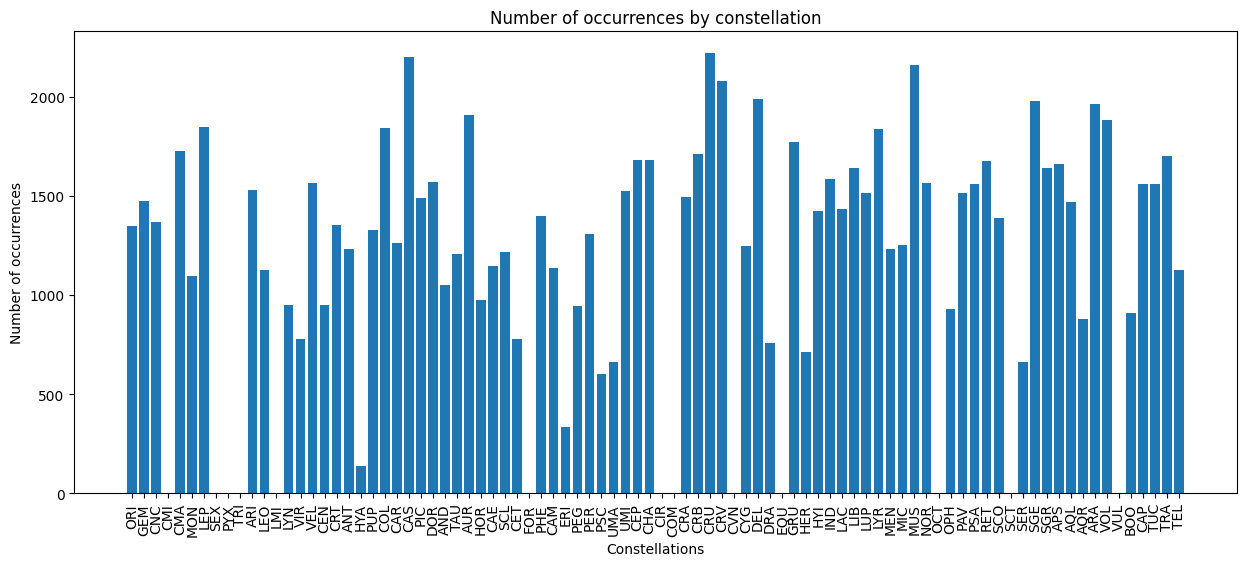

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the correspondence between constellations and numbers
constellation_mapping = {0: 'ORI', 1: 'GEM', 2: 'CNC', 3: 'CMI', 4: 'CMA', 5: 'MON', 6: 'LEP', 7: 'SEX', 8: 'PYX', 9: 'TRI', 10: 'ARI', 11: 'LEO', 12: 'LMI', 13: 'LYN', 14: 'VIR', 15: 'VEL', 16: 'CEN', 17: 'CRT', 18: 'ANT', 19: 'HYA', 20: 'PUP', 21: 'COL', 22: 'CAR', 23: 'CAS', 24: 'PIC', 25: 'DOR', 26: 'AND', 27: 'TAU', 28: 'AUR', 29: 'HOR', 30: 'CAE', 31: 'SCL', 32: 'CET', 33: 'FOR', 34: 'PHE', 35: 'CAM', 36: 'ERI', 37: 'PEG', 38: 'PER', 39: 'PSC', 40: 'UMA', 41: 'UMI', 42: 'CEP', 43: 'CHA', 44: 'CIR', 45: 'COM', 46: 'CRA', 47: 'CRB', 48: 'CRU', 49: 'CRV', 50: 'CVN', 51: 'CYG', 52: 'DEL', 53: 'DRA', 54: 'EQU', 55: 'GRU', 56: 'HER', 57: 'HYI', 58: 'IND', 59: 'LAC', 60: 'LIB', 61: 'LUP', 62: 'LYR', 63: 'MEN', 64: 'MIC', 65: 'MUS', 66: 'NOR', 67: 'OCT', 68: 'OPH', 69: 'PAV', 70: 'PSA', 71: 'RET', 72: 'SCO', 73: 'SCT', 74: 'SER', 75: 'SGE', 76: 'SGR', 77: 'APS', 78: 'AQL', 79: 'AQR', 80: 'ARA', 81: 'VOL', 82: 'VUL', 83: 'BOO', 84: 'CAP', 85: 'TUC', 86: 'TRA', 87: 'TEL'}

# Count the occurrences of each class
class_counts = {key: 0 for key in constellation_mapping.keys()}
label_folders = ['train', 'test', 'val']
for folder in label_folders:
    label_dir = os.path.join('/content/drive/MyDrive/final_one/labels', folder)
    for label_file in os.listdir(label_dir):
        with open(os.path.join(label_dir, label_file), 'r') as f:
            for line in f.readlines():
                class_id = int(line.strip().split()[0])
                class_counts[class_id] += 1

# Prepare data for the bar plot
class_names = [constellation_mapping[i] for i in range(len(constellation_mapping))]
occurrences = [class_counts[i] for i in range(len(constellation_mapping))]

# Create the bar plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(class_names, occurrences)

plt.xticks(rotation='vertical')
plt.xlabel('Constellations')
plt.ylabel('Number of occurrences')
plt.title('Number of occurrences by constellation')

# Save the plot as an image file
plt.savefig('constellation_counts.png', bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
!unzip -q /content/drive/MyDrive/train1.zip -d ../

# 1. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp3/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/poze
#display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], source=/content/drive/MyDrive/poze, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-144-ga66fa83 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 7247461 parameters, 0 gradients, 16.5 GFLOPs
image 1/12 /content/drive/MyDrive/poze/DSC_3561.JPG: 448x640 (no detections), 84.1ms
image 2/12 /content/drive/MyDrive/poze/DSC_3562.JPG: 448x640 (no detections), 6.8ms
image 3/12 /content/drive/MyDrive/poze/DSC_3563.JPG: 448x640 (no detections

# 2. Validate
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

  0%|          | 0.00/780M [00:00<?, ?B/s]

In [ ]:
# Validate YOLOv5s on COCO val
!python val.py --weights /content/yolov5/runs/train/exp/weights/best.pt --data custom_data.yaml --img 640 --half --task test

val: data=custom_data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-154-gf3ee596 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 7247461 parameters, 0 gradients, 16.5 GFLOPs
test: Scanning /content/drive/MyDrive/final_one/labels/test.cache... 2400 images, 306 backgrounds, 0 corrupt: 100% 2400/2400 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 75/75 [07:58<00:00,  6.38s/it]
                   all       2400      10462      0.917      0.827      0.886      0.681
Speed: 0.1ms p

# 3. Train

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/im/integrations-loop.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br><br>

A **Mosaic Dataloader** is used for training which combines 4 images into 1 mosaic.

## Train on Custom Data with Roboflow 🌟 NEW

[Roboflow](https://roboflow.com/?ref=ultralytics) enables you to easily **organize, label, and prepare** a high quality dataset with your own custom data. Roboflow also makes it easy to establish an active learning pipeline, collaborate with your team on dataset improvement, and integrate directly into your model building workflow with the `roboflow` pip package.

- Custom Training Example: [https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/](https://blog.roboflow.com/how-to-train-yolov5-on-a-custom-dataset/?ref=ultralytics)
- Custom Training Notebook: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/yolov5-custom-training-tutorial/blob/main/yolov5-custom-training.ipynb)
<br>

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="480" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/6152a275ad4b4ac20cd2e21a_roboflow-annotate.gif"/></a></p>Label images lightning fast (including with model-assisted labeling)

In [ ]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['ClearML', 'Comet', 'TensorBoard']

if logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.4/488.4 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.9/505.9 kB 45.6 MB/s eta 0:00:00


Preprocessing

In [ ]:
import cv2
import os
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
from skimage import exposure, color

data_dir = '/content/drive/MyDrive/yolo_automated_bortle1/images'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
val_dir = os.path.join(data_dir, 'val')
classes = os.listdir(train_dir)

def preprocess_images(train_dir, test_dir, val_dir):
     for dataset_dir, output_dir in [(train_dir, 'train'), (test_dir, 'test'), (val_dir, 'val')]:
          path = dataset_dir
          out_path = os.path.join('/content/drive/MyDrive/yolo_automated_bortle1_preprocessed', output_dir)
          for img_file in os.listdir(path):
              img_path = os.path.join(path, img_file)
              img = cv2.imread(img_path)
                
              # fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12, 30))
              # ax[0].imshow(img)
              # ax[0].set_title("Original image")
  
              # normalize pixel values to be between 0 and 1
              img = img.astype('float32') / 255.0  

              # convert to grayscale
              gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
              
              # ax[1].imshow(gray, cmap='gray')
              # ax[1].set_title("Grayscale image")

              # Adjust the brightness and contrast of the image
              alpha = 2  # contrast control (1.0-3.0)
              beta = 30  # brightness control (0-100)
              adjusted = cv2.convertScaleAbs(gray, alpha=alpha, beta=beta)
              
              # rescale pixel values back to the 0-255 range and save the enhanced image
              adjusted = (adjusted * 255).astype('uint8')
              
              # ax[2].imshow(adjusted, cmap='gray')
              # ax[2].set_title("Contrast stretched image")
              
              # Apply Gaussian blurring to the image
              blurred = cv2.GaussianBlur(adjusted, (5, 5), 0)
              
              # ax[3].imshow(blurred, cmap='gray')
              # ax[3].set_title("Gaussian blurred image")
              
              # apply histogram equalization
              clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
              img_clahe = clahe.apply(blurred)
              # ax[4].imshow(img_clahe, cmap='gray')
              # ax[4].set_title("Histogram equalized image")
              
              plt.imshow(img_clahe, cmap='gray')
              plt.savefig(os.path.join(out_path, img_file))

 
preprocess_images(train_dir, test_dir, val_dir)


In [ ]:
import os
os.chdir("/content/yolov5")

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 100 --data custom_data.yaml --weights best.pt --cache ram

train: weights=best.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-154-gf3ee596 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=

In [ ]:
!zip -r /content/yolov5/runs/val/exp.zip /content/yolov5/runs/val/exp

  adding: content/yolov5/runs/val/exp/ (stored 0%)
  adding: content/yolov5/runs/val/exp/val_batch0_pred.jpg (deflated 29%)
  adding: content/yolov5/runs/val/exp/val_batch0_labels.jpg (deflated 34%)
  adding: content/yolov5/runs/val/exp/val_batch1_labels.jpg (deflated 34%)
  adding: content/yolov5/runs/val/exp/P_curve.png (deflated 10%)
  adding: content/yolov5/runs/val/exp/confusion_matrix.png (deflated 19%)
  adding: content/yolov5/runs/val/exp/PR_curve.png (deflated 8%)
  adding: content/yolov5/runs/val/exp/F1_curve.png (deflated 5%)
  adding: content/yolov5/runs/val/exp/R_curve.png (deflated 9%)
  adding: content/yolov5/runs/val/exp/val_batch2_labels.jpg (deflated 33%)
  adding: content/yolov5/runs/val/exp/val_batch1_pred.jpg (deflated 27%)
  adding: content/yolov5/runs/val/exp/val_batch2_pred.jpg (deflated 30%)


# 4. Visualize

## Comet Logging and Visualization 🌟 NEW

[Comet](https://www.comet.com/site/lp/yolov5-with-comet/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab) is now fully integrated with YOLOv5. Track and visualize model metrics in real time, save your hyperparameters, datasets, and model checkpoints, and visualize your model predictions with [Comet Custom Panels](https://www.comet.com/docs/v2/guides/comet-dashboard/code-panels/about-panels/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab)! Comet makes sure you never lose track of your work and makes it easy to share results and collaborate across teams of all sizes!

Getting started is easy:
```shell
pip install comet_ml  # 1. install
export COMET_API_KEY=<Your API Key>  # 2. paste API key
python train.py --img 640 --epochs 3 --data coco128.yaml --weights yolov5s.pt  # 3. train
```
To learn more about all of the supported Comet features for this integration, check out the [Comet Tutorial](https://github.com/ultralytics/yolov5/tree/master/utils/loggers/comet). If you'd like to learn more about Comet, head over to our [documentation](https://www.comet.com/docs/v2/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab). Get started by trying out the Comet Colab Notebook:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1RG0WOQyxlDlo5Km8GogJpIEJlg_5lyYO?usp=sharing)

<a href="https://bit.ly/yolov5-readme-comet2">
<img alt="Comet Dashboard" src="https://user-images.githubusercontent.com/26833433/202851203-164e94e1-2238-46dd-91f8-de020e9d6b41.png" width="1280"/></a>

In [ ]:
!python export.py --weights runs/train/exp/weights/best.pt --include torchscript

export: data=data/coco128.yaml, weights=['runs/train/exp/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5 🚀 v7.0-154-gf3ee596 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7247461 parameters, 0 gradients, 16.5 GFLOPs

PyTorch: starting from runs/train/exp/weights/best.pt with output shape (1, 25200, 93) (14.1 MB)

TorchScript: starting export with torch 2.0.0+cu118...
TorchScript: export success ✅ 1.6s, saved as runs/train/exp/weights/best.torchscript (28.1 MB)

Export complete (2.0s)
Results saved to /content/yolov5/runs/train/exp/weights
Detect:          python detect.py --weights runs/train/exp/weights/best.torchscript 
Validate:        python val.py --weights runs/train/e

## ClearML Logging and Automation 🌟 NEW

[ClearML](https://cutt.ly/yolov5-notebook-clearml) is completely integrated into YOLOv5 to track your experimentation, manage dataset versions and even remotely execute training runs. To enable ClearML (check cells above):

- `pip install clearml`
- run `clearml-init` to connect to a ClearML server (**deploy your own [open-source server](https://github.com/allegroai/clearml-server)**, or use our [free hosted server](https://cutt.ly/yolov5-notebook-clearml))

You'll get all the great expected features from an experiment manager: live updates, model upload, experiment comparison etc. but ClearML also tracks uncommitted changes and installed packages for example. Thanks to that ClearML Tasks (which is what we call experiments) are also reproducible on different machines! With only 1 extra line, we can schedule a YOLOv5 training task on a queue to be executed by any number of ClearML Agents (workers).

You can use ClearML Data to version your dataset and then pass it to YOLOv5 simply using its unique ID. This will help you keep track of your data without adding extra hassle. Explore the [ClearML Tutorial](https://github.com/ultralytics/yolov5/tree/master/utils/loggers/clearml) for details!

<a href="https://cutt.ly/yolov5-notebook-clearml">
<img alt="ClearML Experiment Management UI" src="https://github.com/thepycoder/clearml_screenshots/raw/main/scalars.jpg" width="1280"/></a>

## Local Logging

Training results are automatically logged with [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) loggers to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc.

This directory contains train and val statistics, mosaics, labels, predictions and augmentated mosaics, as well as metrics and charts including precision-recall (PR) curves and confusion matrices. 

<img alt="Local logging results" src="https://user-images.githubusercontent.com/26833433/183222430-e1abd1b7-782c-4cde-b04d-ad52926bf818.jpg" width="1280"/>


# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Notebooks** with free GPU: <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a> <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/AWS-Quickstart)
- **Docker Image**. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![YOLOv5 CI](https://github.com/ultralytics/yolov5/actions/workflows/ci-testing.yml/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on macOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Additional content below.

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)  # yolov5n - yolov5x6 or custom
im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.